In [108]:
import os
import sys
import base64
from io import BytesIO

import numpy as np
from PIL import Image

sys.path.append("..")
from dash_image_components import b64_to_numpy

ImportError: cannot import name 'b64_to_numpy'

In [81]:
# Displays images smaller
def display(im, new_width=800):
    ratio = new_width / im.size[0]
    new_height = round(im.size[1] * ratio)
    return im.resize((new_width, new_height))

## Testing PIL vs b64

Shape of Image: (3356, 2412)
Size of Image: 755813 bytes


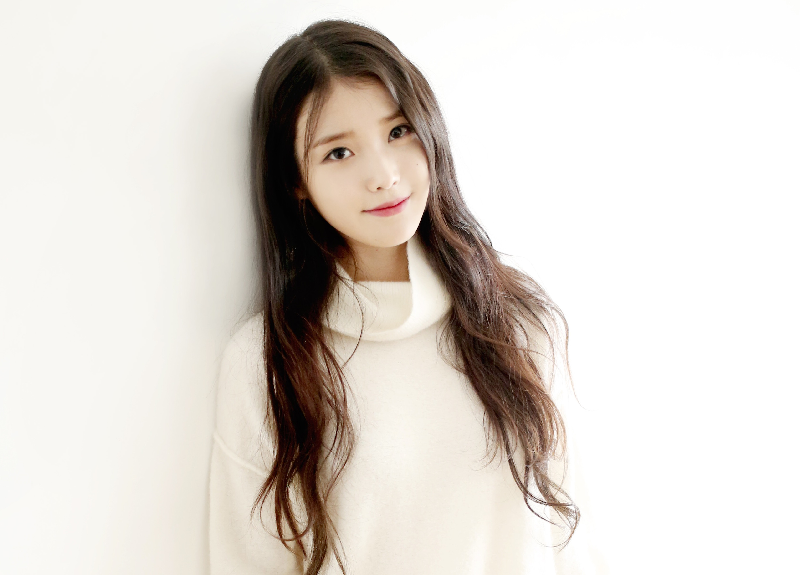

In [82]:
image_path = "../images/IU.jpg"

im = Image.open(image_path)
print("Shape of Image:", im.size)
print("Size of Image:", os.stat(image_path).st_size, "bytes")
display(im)

### Encoding

In [66]:
enc_png = pil_to_b64(im)
print("PNG results:")
print("Length of string:", len(enc_png))
print("Size of string:", sys.getsizeof(enc_png), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit pil_to_b64(im)

enc_jpg = pil_to_b64(im, enc_format='jpeg')
print("\nJPEG results:")
print("Length of string:", len(enc_jpg))
print("Size of string:", sys.getsizeof(enc_jpg), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit pil_to_b64(im, enc_format='jpeg')

PNG results:
Length of string: 4421876
Size of string: 4421925 bytes
Time taken to convert from PIL to b64:
1.77 s ± 66.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

JPEG results:
Length of string: 483156
Size of string: 483205 bytes
Time taken to convert from PIL to b64:
229 ms ± 9.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Decoding

In [67]:
dec_png = b64_to_pil(enc_png)
print("PNG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_png)

dec_jpg = b64_to_pil(enc_jpg)
print("\nJPEG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_jpg)

PNG results:
Time taken to convert from b64 to PIL:
30.6 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

JPEG results:
Time taken to convert from b64 to PIL:
2.48 ms ± 98.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


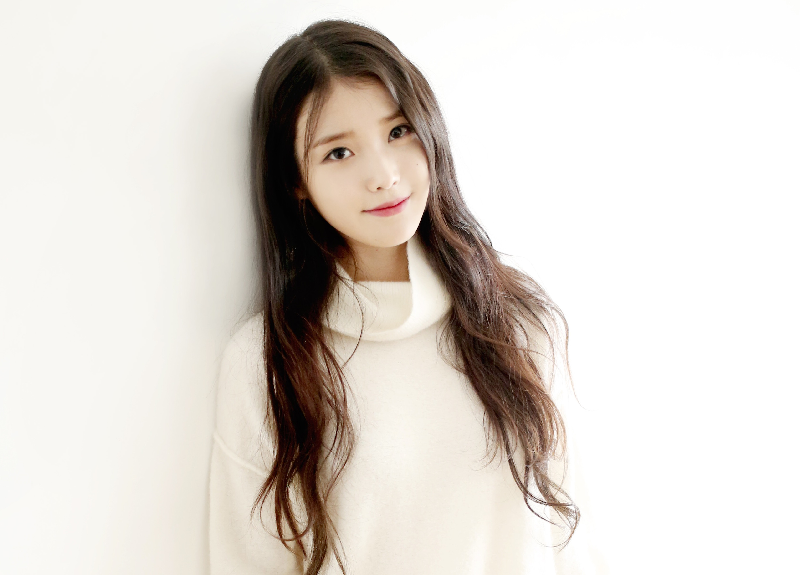

In [83]:
decoded = b64_to_pil(enc_png)
display(decoded)

## Testing Numpy and b64

In [105]:
# Get numpy array from previous image
np_array = np.asarray(im)
print("Numpy array shape:", np_array.shape)
print("Numpy array size:", np_array.nbytes, "bytes")

enc_png = numpy_to_b64(im, scalar=False, enc_format='png')
print("\nPNG results:")
print("Length of string:", len(enc_png))
print("Size of string:", sys.getsizeof(enc_png), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit numpy_to_b64(im, scalar=False)

enc_jpg = numpy_to_b64(im, scalar=False, enc_format='jpeg')
print("\nJPEG results:")
print("Length of string:", len(enc_jpg))
print("Size of string:", sys.getsizeof(enc_jpg), "bytes")
print("Time taken to convert from PIL to b64:")
%timeit numpy_to_b64(im, scalar=False, enc_format='jpeg')

Numpy array shape: (2412, 3356, 3)
Numpy array size: 24284016 bytes

PNG results:
Length of string: 4421876
Size of string: 4421925 bytes
Time taken to convert from PIL to b64:
1.85 s ± 98.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

JPEG results:
Length of string: 483156
Size of string: 483205 bytes
Time taken to convert from PIL to b64:
319 ms ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [106]:
dec_png = b64_to_numpy(enc_png)
print("PNG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_png)

dec_jpg = b64_to_numpy(enc_jpg)
print("\nJPEG results:")
print("Time taken to convert from b64 to PIL:")
%timeit b64_to_pil(enc_jpg)

NameError: name 'b64_to_numpy' is not defined